<a href="https://colab.research.google.com/github/Judy-Choi/Tensorflow_Certificate/blob/main/3_(HW)_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal Metric:
- val_loss : 0.5
- val_acc : -

# Dense layer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def solution_model():
    cifar10 = tf.keras.datasets.cifar10

    # YOUR CODE HERE
    (x_train, y_train), (x_valid, y_valid) = cifar10.load_data()
    x_train = x_train/255.0
    x_valid = x_valid/255.0

    model = Sequential([
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])

    opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])

    checkpoint_path = "checkpoint.ckpt"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
        save_weights_only=True, 
        save_best_only=True, 
        monitor='val_loss', 
        verbose=1)
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    history = model.fit(x_train, y_train,
        validation_data=(x_valid, y_valid),
        epochs=200,
        callbacks=[checkpoint, early_stopping]
     )
    model.load_weights(checkpoint_path)

    return model


# Note that you'll need to save your model as a .h5 like this
# This .h5 will be uploaded to the testing infrastructure
# and a score will be returned to you
if __name__ == '__main__':
    model = solution_model()
    model.save("cifar10.h5")
    # checkpoint 를 저장한 파일명을 입력합니다.
    model.load_weights(checkpoint_path)
    # 모델의 구조와 파라미터를 출력합니다.
    model.summary()
    model.evaluate(x_test, y_test)

# # 다음 줄아래는 복사하지 마세요..
#     from google.colab import files
#     files.download('cifar10.h5')


Epoch 1/200
1555/1563 [============================>.] - ETA: 0s - loss: 2.1798 - acc: 0.1976
Epoch 1: val_loss improved from inf to 1.90124, saving model to checkpoint.ckpt
1563/1563 [==============================] - 14s 7ms/step - loss: 2.1788 - acc: 0.1980 - val_loss: 1.9012 - val_acc: 0.3006
Epoch 2/200
1563/1563 [==============================] - ETA: 0s - loss: 1.9445 - acc: 0.2826
Epoch 2: val_loss improved from 1.90124 to 1.82758, saving model to checkpoint.ckpt
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9445 - acc: 0.2826 - val_loss: 1.8276 - val_acc: 0.3358
Epoch 3/200
1555/1563 [============================>.] - ETA: 0s - loss: 1.9014 - acc: 0.3025
Epoch 3: val_loss improved from 1.82758 to 1.77990, saving model to checkpoint.ckpt
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9010 - acc: 0.3025 - val_loss: 1.7799 - val_acc: 0.3522
Epoch 4/200
1563/1563 [==============================] - ETA: 0s - loss: 1.8720 - acc: 0.3156
Epoc

KeyboardInterrupt: ignored

# CNN

In [2]:
# ======================================================================
# There are 5 questions in this test with increasing difficulty from 1-5
# Please note that the weight of the grade for the question is relative
# to its difficulty. So your Category 1 question will score much less
# than your Category 5 question.
# ======================================================================
#
# Basic Datasets Question
#
# Create a classifier for the CIFAR-10 dataset
# Note that the test will expect it to classify 10 classes and that the 
# input shape should be the native size of the CIFAR-10 dataset which is 
# 28x28 monochrome. Do not resize the data. Your input layer should accept
# (28,28) as the input shape only. If you amend this, the tests will fail.
#

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def solution_model():
    cifar10 = tf.keras.datasets.cifar10

    # YOUR CODE HERE
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train/255.0
    x_test = x_test/255.0

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(), 
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),   
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),

        Dense(10, activation='softmax')
    ])
    opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])

    checkpoint_path = "checkpoint.ckpt"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
        save_weights_only=True, 
        save_best_only=True, 
        monitor='val_loss', 
        verbose=1)
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    history = model.fit(x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=200,
        callbacks=[checkpoint, early_stopping]
     )

    # checkpoint 를 저장한 파일명을 입력합니다.
    model.load_weights(checkpoint_path)
    # 모델의 구조와 파라미터를 출력합니다.
    model.summary()
    model.evaluate(x_test, y_test)

    return model


# Note that you'll need to save your model as a .h5 like this
# This .h5 will be uploaded to the testing infrastructure
# and a score will be returned to you
if __name__ == '__main__':
    model = solution_model()
    # model.save("cifar10.h5")

# 다음 줄아래는 복사하지 마세요..
    # from google.colab import files
    # files.download('cifar10.h5')


Epoch 1/200
1560/1563 [============================>.] - ETA: 0s - loss: 1.7347 - acc: 0.4018
Epoch 1: val_loss improved from inf to 1.38392, saving model to checkpoint.ckpt
1563/1563 [==============================] - 19s 10ms/step - loss: 1.7345 - acc: 0.4019 - val_loss: 1.3839 - val_acc: 0.5352
Epoch 2/200
1561/1563 [============================>.] - ETA: 0s - loss: 1.3582 - acc: 0.5339
Epoch 2: val_loss improved from 1.38392 to 1.19123, saving model to checkpoint.ckpt
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3581 - acc: 0.5339 - val_loss: 1.1912 - val_acc: 0.6008
Epoch 3/200
1559/1563 [============================>.] - ETA: 0s - loss: 1.2215 - acc: 0.5874
Epoch 3: val_loss did not improve from 1.19123
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2211 - acc: 0.5875 - val_loss: 1.4184 - val_acc: 0.6108
Epoch 4/200
1562/1563 [============================>.] - ETA: 0s - loss: 1.1015 - acc: 0.6312
Epoch 4: val_loss improved from 1.19123

# Homework 1 : Dense layer

## 직접 코딩

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def solution_model():
    cifar10 = tf.keras.datasets.cifar10

    # YOUR CODE HERE
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train/255.0
    x_test = x_test/255.0

    model = Sequential([
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])

    # opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, momentum=0.9)
    # model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])

    # Change optimizer -> Adam
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

    checkpoint_path = "checkpoint.ckpt"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
        save_weights_only=True, 
        save_best_only=True, 
        monitor='val_loss', 
        verbose=1)
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    history = model.fit(x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=50,
        callbacks=[checkpoint, early_stopping]
     )
    
    # checkpoint 를 저장한 파일명을 입력합니다.
    model.load_weights(checkpoint_path)
    # 모델의 구조와 파라미터를 출력합니다.
    model.summary()
    model.evaluate(x_test, y_test)

    return model


# Note that you'll need to save your model as a .h5 like this
# This .h5 will be uploaded to the testing infrastructure
# and a score will be returned to you
if __name__ == '__main__':
    model = solution_model()
    # model.save("cifar10.h5")

# # 다음 줄아래는 복사하지 마세요..
#     from google.colab import files
#     files.download('cifar10.h5')


Epoch 1/50
1558/1563 [============================>.] - ETA: 0s - loss: 2.2159 - acc: 0.1780
Epoch 1: val_loss improved from inf to 1.99636, saving model to checkpoint.ckpt
1563/1563 [==============================] - 14s 7ms/step - loss: 2.2156 - acc: 0.1782 - val_loss: 1.9964 - val_acc: 0.2486
Epoch 2/50
1562/1563 [============================>.] - ETA: 0s - loss: 1.9988 - acc: 0.2533
Epoch 2: val_loss improved from 1.99636 to 1.90283, saving model to checkpoint.ckpt
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9988 - acc: 0.2532 - val_loss: 1.9028 - val_acc: 0.2973
Epoch 3/50
1561/1563 [============================>.] - ETA: 0s - loss: 1.9483 - acc: 0.2765
Epoch 3: val_loss improved from 1.90283 to 1.83971, saving model to checkpoint.ckpt
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9483 - acc: 0.2765 - val_loss: 1.8397 - val_acc: 0.3379
Epoch 4/50
1556/1563 [============================>.] - ETA: 0s - loss: 1.9218 - acc: 0.2885
Epoch 4:

## ChatGPT

170498071/170498071 [==============================] - 2s 0us/step


Epoch 1/100
383/391 [============================>.] - ETA: 0s - loss: 1.9734 - accuracy: 0.3099
Epoch 1: val_loss improved from inf to 1.71026, saving model to cifar10.h5
391/391 [==============================] - 11s 8ms/step - loss: 1.9701 - accuracy: 0.3107 - val_loss: 1.7103 - val_accuracy: 0.3880 - lr: 0.0010
Epoch 2/100
387/391 [============================>.] - ETA: 0s - loss: 1.7275 - accuracy: 0.3823
Epoch 2: val_loss did not improve from 1.71026
391/391 [==============================] - 3s 8ms/step - loss: 1.7273 - accuracy: 0.3822 - val_loss: 1.8079 - val_accuracy: 0.3442 - lr: 0.0010
Epoch 3/100
389/391 [============================>.] - ETA: 0s - loss: 1.6560 - accuracy: 0.4083
Epoch 3: val_loss improved from 1.71026 to 1.65755, saving model to cifar10.h5
391/391 [==============================] - 3s 7ms/step - loss: 1.6556 - accuracy: 0.4084 - val_loss: 1.6575 - val_accuracy: 0.4018 - lr: 0.0010
Epoch 4/100
383/391 [============================>.] - ETA: 0s - loss: 1.60

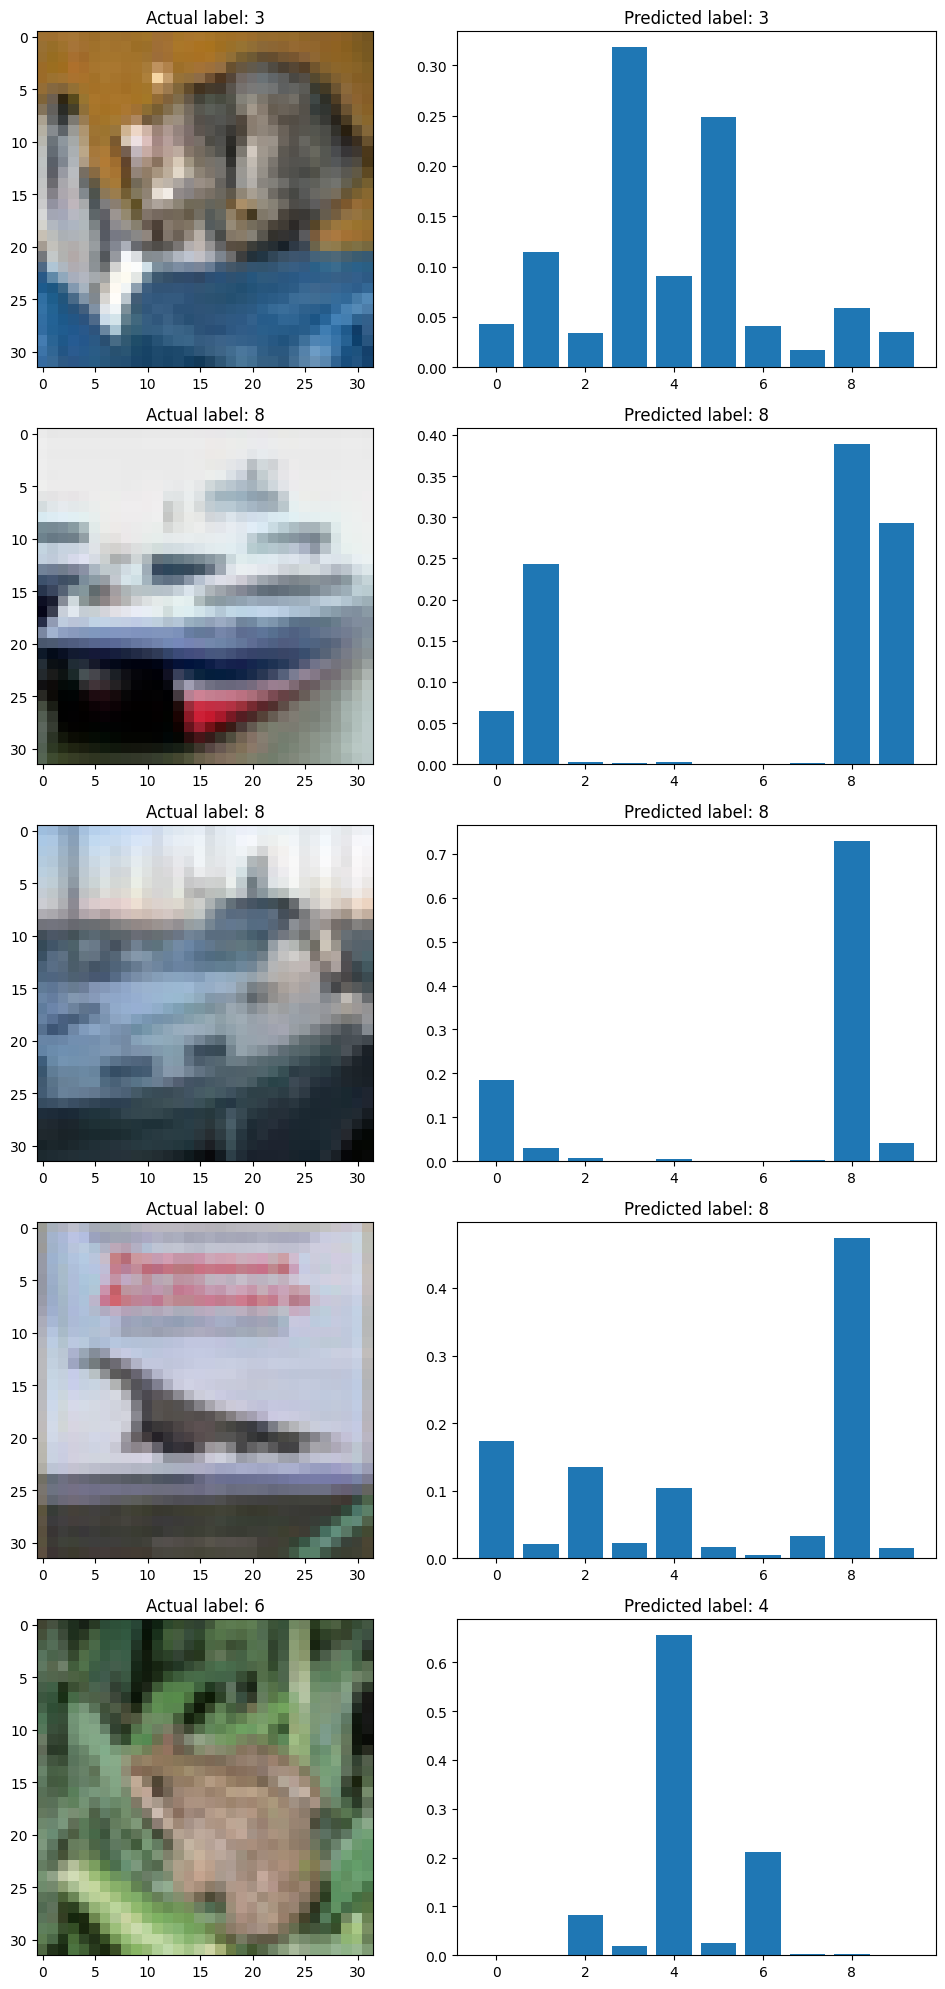

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert the labels to categorical format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Normalize the input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Create the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(32*32*3,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Define the callbacks
checkpoint = ModelCheckpoint('cifar10.h5', monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(x_train.reshape((-1, 32*32*3)), y_train, epochs=100, batch_size=128,
                    validation_data=(x_test.reshape((-1, 32*32*3)), y_test),
                    callbacks=[checkpoint, early_stopping, reduce_lr], verbose=1)

# Print the validation accuracy and loss
val_loss, val_acc = model.evaluate(x_test.reshape((-1, 32*32*3)), y_test)
print('Validation accuracy:', val_acc)
print('Validation loss:', val_loss)

# Inference 5 data from test dataset to verify the results
predictions = model.predict(x_test.reshape((-1, 32*32*3)))
for i in range(5):
    print('Actual label:', np.argmax(y_test[i]))
    print('Predicted label:', np.argmax(predictions[i]))

# Draw picture to verify data by plotting predicted value and actual value
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))
for i in range(5):
    axes[i][0].imshow(x_test[i])
    axes[i][0].set_title('Actual label: {}'.format(np.argmax(y_test[i])))
    axes[i][1].bar(range(10), predictions[i])
    axes[i][1].set_title('Predicted label: {}'.format(np.argmax(predictions[i])))
plt.tight_layout()
plt.show()


# Homework 2 : CNN

## 직접 코딩

### 1. Dense layer 추가 : 성능 저하


In [1]:
# ======================================================================
# There are 5 questions in this test with increasing difficulty from 1-5
# Please note that the weight of the grade for the question is relative
# to its difficulty. So your Category 1 question will score much less
# than your Category 5 question.
# ======================================================================
#
# Basic Datasets Question
#
# Create a classifier for the CIFAR-10 dataset
# Note that the test will expect it to classify 10 classes and that the 
# input shape should be the native size of the CIFAR-10 dataset which is 
# 28x28 monochrome. Do not resize the data. Your input layer should accept
# (28,28) as the input shape only. If you amend this, the tests will fail.
#

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def solution_model():
    cifar10 = tf.keras.datasets.cifar10

    # YOUR CODE HERE
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train/255.0
    x_test = x_test/255.0

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(), 
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),   
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        # Dense layer 추가
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, momentum=0.9)

    # Adam 으로 교체
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])

    checkpoint_path = "checkpoint.ckpt"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
        save_weights_only=True, 
        save_best_only=True, 
        monitor='val_loss', 
        verbose=1)
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    history = model.fit(x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=200,
        callbacks=[checkpoint, early_stopping]
     )

    # checkpoint 를 저장한 파일명을 입력합니다.
    model.load_weights(checkpoint_path)
    # 모델의 구조와 파라미터를 출력합니다.
    model.summary()
    model.evaluate(x_test, y_test)

    return model


# Note that you'll need to save your model as a .h5 like this
# This .h5 will be uploaded to the testing infrastructure
# and a score will be returned to you
if __name__ == '__main__':
    model = solution_model()
    # model.save("cifar10.h5")

# 다음 줄아래는 복사하지 마세요..
    # from google.colab import files
    # files.download('cifar10.h5')


Epoch 1/200
1563/1563 [==============================] - ETA: 0s - loss: 2.1923 - acc: 0.1582
Epoch 1: val_loss improved from inf to 1.84712, saving model to checkpoint.ckpt
1563/1563 [==============================] - 33s 11ms/step - loss: 2.1923 - acc: 0.1582 - val_loss: 1.8471 - val_acc: 0.2509
Epoch 2/200
1562/1563 [============================>.] - ETA: 0s - loss: 1.8766 - acc: 0.2771
Epoch 2: val_loss improved from 1.84712 to 1.68604, saving model to checkpoint.ckpt
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8768 - acc: 0.2771 - val_loss: 1.6860 - val_acc: 0.3371
Epoch 3/200
1563/1563 [==============================] - ETA: 0s - loss: 1.7556 - acc: 0.3302
Epoch 3: val_loss did not improve from 1.68604
1563/1563 [==============================] - 16s 10ms/step - loss: 1.7556 - acc: 0.3302 - val_loss: 1.9275 - val_acc: 0.3270
Epoch 4/200
1560/1563 [============================>.] - ETA: 0s - loss: 1.7089 - acc: 0.3628
Epoch 4: val_loss improved from 1.6860

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2. CNN layer 추가 : 성능 개선
단, val_loss 값이 너무 튐 (증가-감소 폭이 너무 큼!)

In [3]:
# ======================================================================
# There are 5 questions in this test with increasing difficulty from 1-5
# Please note that the weight of the grade for the question is relative
# to its difficulty. So your Category 1 question will score much less
# than your Category 5 question.
# ======================================================================
#
# Basic Datasets Question
#
# Create a classifier for the CIFAR-10 dataset
# Note that the test will expect it to classify 10 classes and that the 
# input shape should be the native size of the CIFAR-10 dataset which is 
# 28x28 monochrome. Do not resize the data. Your input layer should accept
# (28,28) as the input shape only. If you amend this, the tests will fail.
#

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def solution_model():
    cifar10 = tf.keras.datasets.cifar10

    # YOUR CODE HERE
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train/255.0
    x_test = x_test/255.0

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(), 
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),   
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),
        # CNN 추가
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),

        Dense(10, activation='softmax')
    ])
    opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])

    checkpoint_path = "checkpoint.ckpt"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
        save_weights_only=True, 
        save_best_only=True, 
        monitor='val_loss', 
        verbose=1)
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    history = model.fit(x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=200,
        callbacks=[checkpoint, early_stopping]
     )

    # checkpoint 를 저장한 파일명을 입력합니다.
    model.load_weights(checkpoint_path)
    # 모델의 구조와 파라미터를 출력합니다.
    model.summary()
    model.evaluate(x_test, y_test)

    return model


# Note that you'll need to save your model as a .h5 like this
# This .h5 will be uploaded to the testing infrastructure
# and a score will be returned to you
if __name__ == '__main__':
    model = solution_model()
    # model.save("cifar10.h5")

# 다음 줄아래는 복사하지 마세요..
    # from google.colab import files
    # files.download('cifar10.h5')


Epoch 1/200
1563/1563 [==============================] - ETA: 0s - loss: 1.8012 - acc: 0.3612
Epoch 1: val_loss improved from inf to 1.35045, saving model to checkpoint.ckpt
1563/1563 [==============================] - 26s 13ms/step - loss: 1.8012 - acc: 0.3612 - val_loss: 1.3505 - val_acc: 0.4989
Epoch 2/200
1563/1563 [==============================] - ETA: 0s - loss: 1.3486 - acc: 0.5350
Epoch 2: val_loss improved from 1.35045 to 1.10430, saving model to checkpoint.ckpt
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3486 - acc: 0.5350 - val_loss: 1.1043 - val_acc: 0.6093
Epoch 3/200
1558/1563 [============================>.] - ETA: 0s - loss: 1.1605 - acc: 0.6162
Epoch 3: val_loss improved from 1.10430 to 1.07267, saving model to checkpoint.ckpt
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1608 - acc: 0.6162 - val_loss: 1.0727 - val_acc: 0.6390
Epoch 4/200
1563/1563 [==============================] - ETA: 0s - loss: 1.0373 - acc: 0.6626
E

## ChatGPT


Epoch 1/100
391/391 [==============================] - ETA: 0s - loss: 1.7991 - accuracy: 0.4418
Epoch 1: val_loss improved from inf to 2.14425, saving model to cifar10.h5
391/391 [==============================] - 19s 25ms/step - loss: 1.7991 - accuracy: 0.4418 - val_loss: 2.1442 - val_accuracy: 0.2797 - lr: 0.0010
Epoch 2/100
390/391 [============================>.] - ETA: 0s - loss: 1.1560 - accuracy: 0.6103
Epoch 2: val_loss improved from 2.14425 to 0.99851, saving model to cifar10.h5
391/391 [==============================] - 9s 22ms/step - loss: 1.1559 - accuracy: 0.6103 - val_loss: 0.9985 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 3/100
391/391 [==============================] - ETA: 0s - loss: 0.9324 - accuracy: 0.6782
Epoch 3: val_loss improved from 0.99851 to 0.78404, saving model to cifar10.h5
391/391 [==============================] - 9s 23ms/step - loss: 0.9324 - accuracy: 0.6782 - val_loss: 0.7840 - val_accuracy: 0.7248 - lr: 0.0010
Epoch 4/100
391/391 [===================

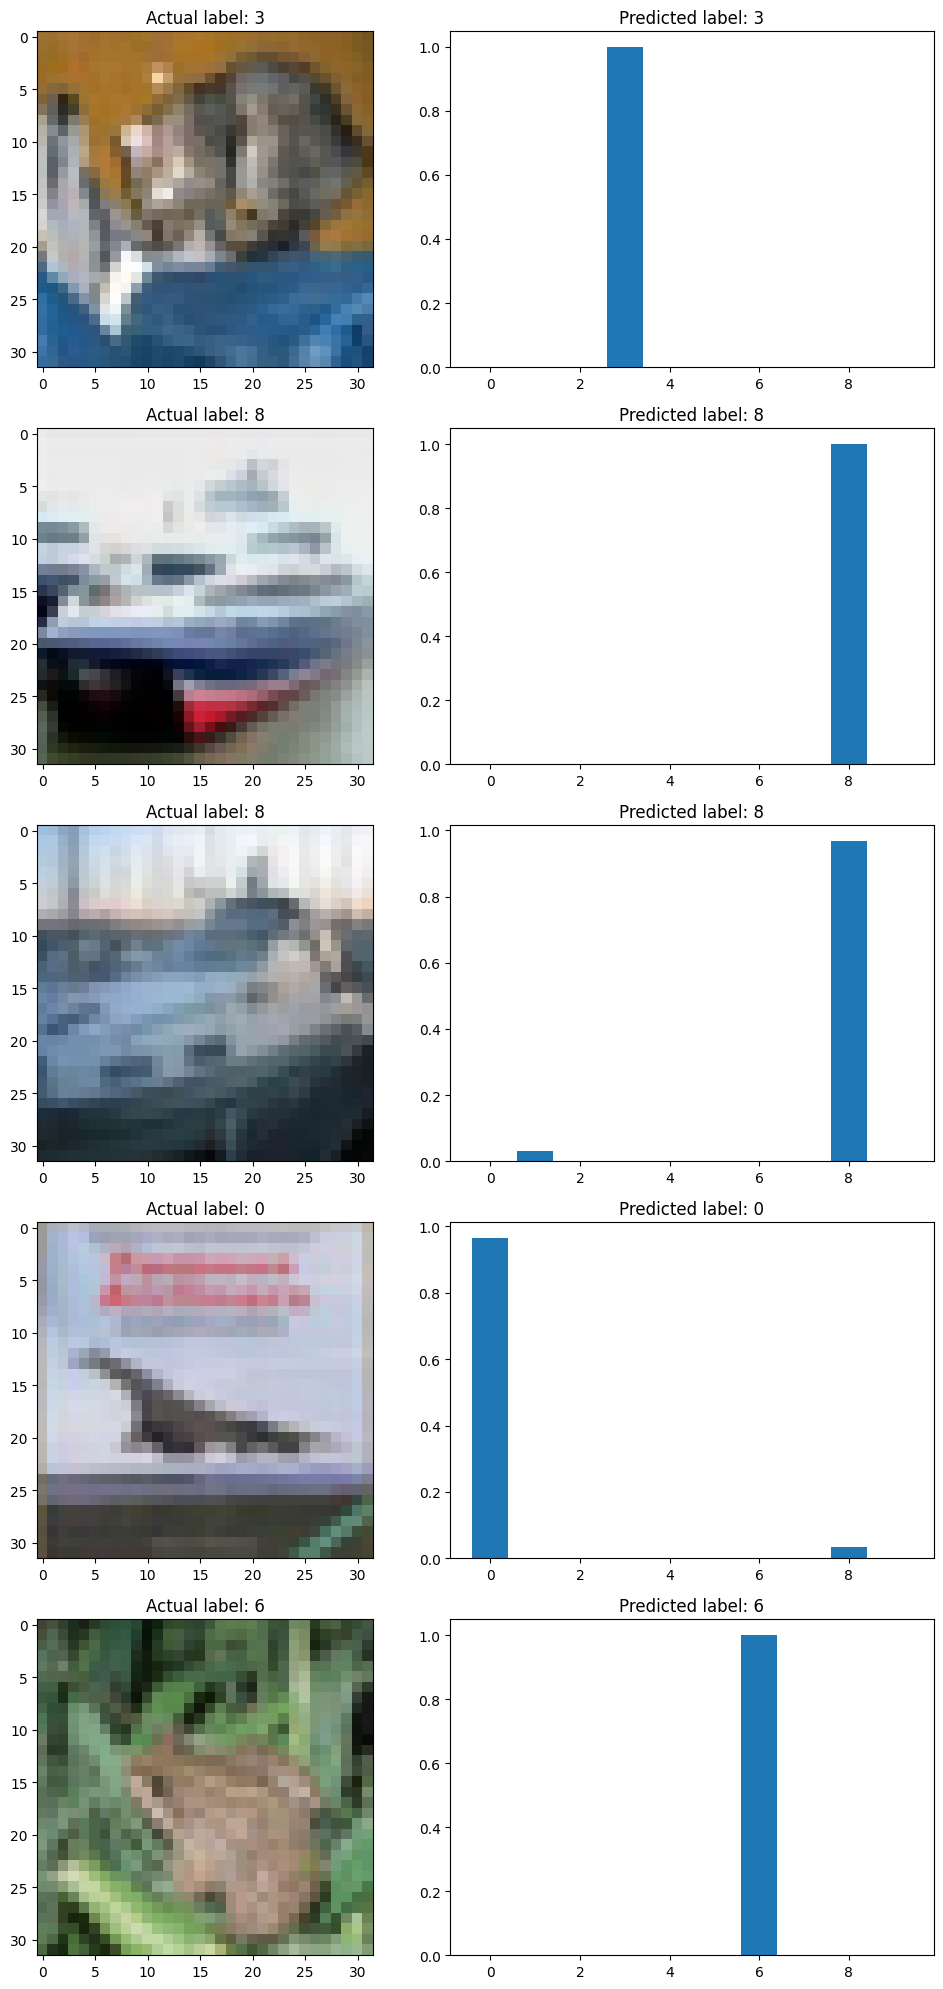

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert the labels to categorical format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Normalize the input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Define the callbacks
checkpoint = ModelCheckpoint('cifar10.h5', monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=128,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint, early_stopping, reduce_lr], verbose=1)

# Print the validation accuracy and loss
val_loss, val_acc = model.evaluate(x_test, y_test)
print('Validation accuracy:', val_acc)
print('Validation loss:', val_loss)

# Inference 5 data from test dataset to verify the results
predictions = model.predict(x_test)
for i in range(5):
    print('Actual label:', np.argmax(y_test[i]))
    print('Predicted label:', np.argmax(predictions[i]))

# Draw picture to verify data by plotting predicted value and actual value
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))
for i in range(5):
    axes[i][0].imshow(x_test[i])
    axes[i][0].set_title('Actual label: {}'.format(np.argmax(y_test[i])))
    axes[i][1].bar(range(10), predictions[i])
    axes[i][1].set_title('Predicted label: {}'.format(np.argmax(predictions[i])))
plt.tight_layout()
plt.show()